---
title: "CPPEvolution"
author: "Rodrigo Bonifácio et al."
date: "6/4/2021"
output: html_document
---

In [1]:
# version
install.packages("sqldf", dependencies = TRUE)
install.packages("stringr", dependencies = TRUE)
install.packages("reshape2", dependencies = TRUE)
install.packages("ggplot2", dependencies = TRUE)
install.packages("lubridate", dependencies = TRUE)
install.packages("lattice", dependencies = TRUE)
install.packages("corrplot", dependencies = TRUE)

also installing the dependencies ‘RJDBC’, ‘rJava’, ‘gsubfn’, ‘proto’, ‘chron’, ‘RH2’, ‘RMySQL’, ‘RPostgreSQL’, ‘svUnit’


Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘RMySQL’ had non-zero exit status”
Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘RPostgreSQL’ had non-zero exit status”
Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘RJDBC’ had non-zero exit status”
Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘RH2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘lazyeval’, ‘rex’, ‘covr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index 

In [2]:
knitr::opts_chunk$set(echo = TRUE)
library(sqldf)
library(stringr)
library(reshape2)
library(ggplot2)
library(lubridate)
library(lattice)
library(dplyr)
library(corrplot)
setwd(".")

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



In [7]:
## Load the KCalc dataset

# "lambda"              "auto"               
# "range_for"           "const_expr"          "if_with_initializer"

ds <- read.csv("full-results.csv", head=T, sep=",")

ds$date <- as.Date(ds$date)

projects <- sqldf("select project, 
                          min(date) as first_revision, 
                          max(date) as last_revision, 
                          count(revision) as commits
                    from ds
                    group by project", method = "name__class")
projects

project,first_revision,last_revision,commits
<chr>,<dbl>,<dbl>,<int>
akonadi,14610,19166,531
akonadi-calendar,14832,19155,353
akonadi-calendar-tools,14619,19157,233
akonadi-contacts,14610,19154,447
akonadi-mime,14614,19167,370
akonadi-notes,15179,19157,301
akonadiconsole,14611,19152,338
akregator,14612,19166,442
alkimia,14752,19151,131


png 
  2

feature,Mean,Max,Min,Median,Std
<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>
lambda,32.78676,902,0,2.0,107.1744
auto,122.15074,4441,0,9.0,392.1129
range_for,60.60662,1720,0,8.5,169.9587


feature,sum(total)
<fct>,<int>
async,0
auto,33225
const_expr,777
decl_type,27
future_declarations,0
if_with_initializer,71
lambda,8918
promise_declarations,0
range_for,16485


feature,percentage
<chr>,<dbl>
auto,80.5147059
const_expr,14.7058824
decl_type,2.2058824
if_with_initializer,4.4117647
lambda,63.6029412
range_for,78.3088235
thread_declarations,0.7352941


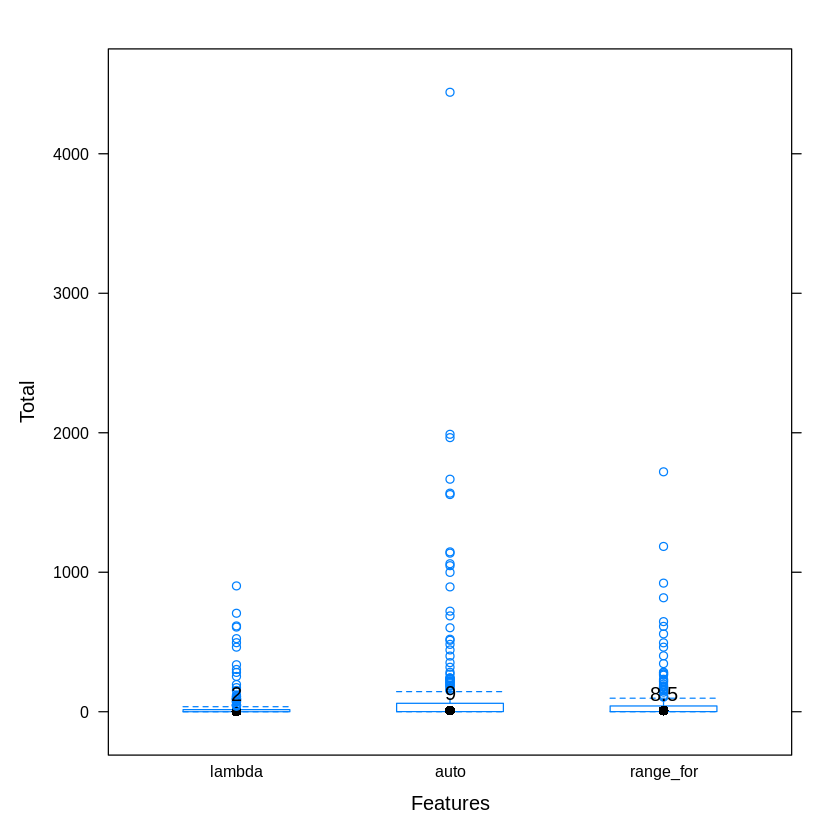

In [10]:
### Research Question 1

rq1 <- sqldf("select ds.project, date, lambda, auto, range_for, if_with_initializer,          
                      thread_declarations,future_declarations, const_expr,
                      shared_future_declarations,decl_type,promise_declarations,async,statements,files
              from ds, projects p
              where ds.project = p.project
                and ds.date = p.last_revision", method = "name__class")

rq1 <- melt(rq1, id.vars=c("project", "date", "statements", "files"), value.name = "total", variable.name="feature")

# colnames(rq1)

rq5 <- sqldf("select project, feature, total
                      from rq1 
                      where feature in ('auto','lambda', 'range_for')
                      order by 2")

pdf("distribution.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")

bwplot(total~feature,data=rq5,xlab="Features",ylab="Total")

dev.off()

bwplot(total~feature,data=rq5,xlab="Features",ylab="Total", md = tapply(rq5$total, rq5$feature, median),
       panel = function(x, y, md, ...) {
         panel.bwplot(x, y, ...)
         panel.text(x = 1:4, y = md, labels = round(md, 2), pos = 3)
       })

rq5%>%
group_by(feature)%>% 
summarise(Mean=mean(total), Max=max(total), Min=min(total), Median=median(total), Std=sd(total))

sqldf("select feature, sum(total)
       from rq1 
       group by feature 
       order by 1")

rq1_summary <- sqldf("select feature, (100*count(distinct project))/272.0 percentage
                      from rq1 
                      where total > 0 
                      group by feature", method = "name__class")

rq1_summary

[1] 272

[1] "project"      "total_lambda" "total_auto"   "total_range"

[1] "Lambda Expressions"   "Auto-typed Variables" "Range-based For"

,Lambda Expressions,Auto-typed Variables,Range-based For
Lambda Expressions,1.0000000,0.7588315,0.7392284
Auto-typed Variables,0.7588315,1.0000000,0.8761122
Range-based For,0.7392284,0.8761122,1.0000000


feature,statments,files
<fct>,<dbl>,<dbl>
lambda,0.5843584,0.6238740
auto,0.5265495,0.5548466
range_for,0.5609206,0.5693804


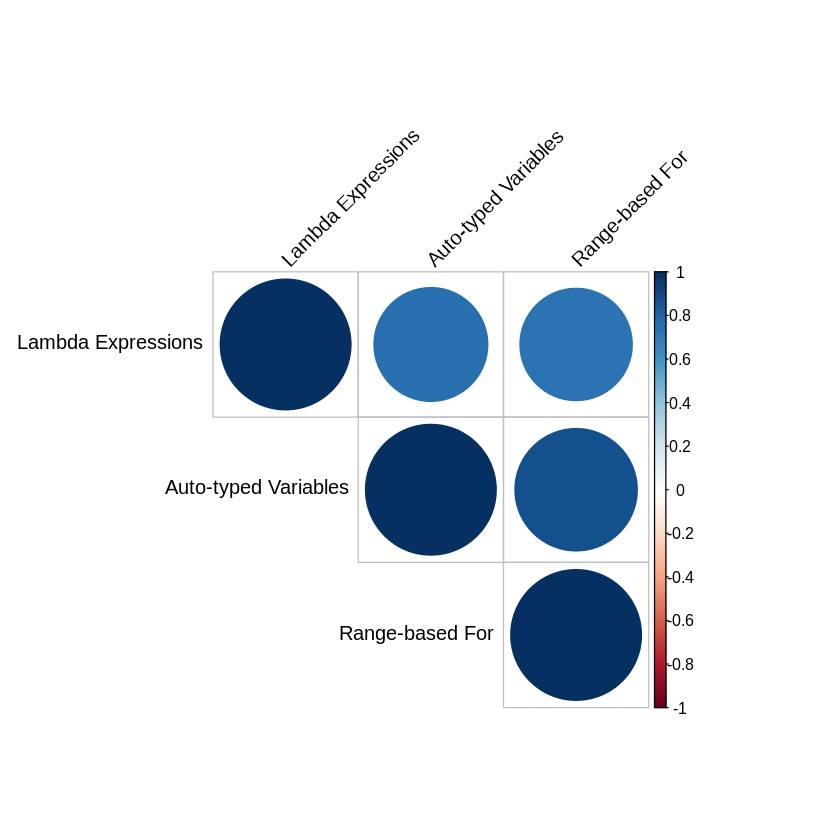

In [11]:
rq6 <- sqldf("select project, feature, statements, files, total
                      from rq1 
                      where feature in ('auto','lambda', 'range_for')
                      order by 2")

# rq6

lambdas <- sqldf("select project, total as total_lambda from rq6 where feature = 'lambda'")
autos <- sqldf("select project, total as total_auto from rq6 where feature = 'auto'")
range_fors <- sqldf("select project, total as total_range from rq6 where feature = 'range_for'")

rq8 <- merge(lambdas,autos)
rq8 <- merge(rq8,range_fors)

nrow(rq8)
colnames(rq8)

rq8 <- sqldf("select total_lambda as [Lambda Expressions], total_auto as [Auto-typed Variables], total_range as [Range-based For] from rq8")

res <- cor(rq8)
colnames(res)
res

corrplot(res, type = "upper", order = "hclust", 
          tl.col = "black", tl.srt = 45)


rq6%>%
group_by(feature)%>% 
summarise(statments=cor(statements,total,method="spearman"), files=cor(files,total,method="spearman"))


In [12]:
cd <- as.Date("2010-01-01")
maxDate <- as.Date("2022-05-01")

accm = ds[FALSE,]
nrow(accm)
while(cd < maxDate) {
  lastCommit <- fn$sqldf("select project, max(date) as date
                       from ds 
                       where date < '$cd'
                       group by project");
  
  
  
  monthYear = format(cd, "%Y-%m");
  
  snapshot <- fn$sqldf("select ds.*, '$monthYear' as monthYear
                        from ds, lastCommit lc
                        where ds.project = lc.project 
                          and ds.date = lc.date");
  
  
  accm <- rbind(accm, snapshot);
  
  # cd <- cd + 7;
  cd <- ymd(cd %m+% months(1))
}

rq2 <- sqldf("select project, monthYear, lambda, auto, range_for, if_with_initializer,          
                      thread_declarations,future_declarations,decl_type,const_expr,
                      shared_future_declarations,promise_declarations,async
              from accm")

sqldf("select count(distinct project) from accm")

rq2 <- melt(rq2, id.vars=c("project", "monthYear"), value.name = "total", variable.name="feature")


sqldf("select feature, min(monthYear)
       from rq2
       where total > 0
       group by feature")

[1] 0

count(distinct project)
<int>
272


feature,min(monthYear)
<fct>,<chr>
auto,2010-03
const_expr,2012-11
decl_type,2010-04
if_with_initializer,2020-05
lambda,2010-03
range_for,2011-12
thread_declarations,2018-05


In [13]:
ts <- sqldf("select feature, monthYear, sum(total) total
       from rq2 
       group by feature, monthYear 
       order by 1,2")

ts$monthYear = as.Date(paste(ts$monthYear,"-01",sep=""))

# Customizing the output
pdf("lambda.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'lambda',], type = "l")
dev.off()

# Customizing the output
pdf("auto.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'auto',], type = "l")
dev.off()

# # Customizing the output
# pdf("decl_type.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")
# xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'decl_type',], type = "l")
# dev.off()


png 
  2

png 
  2

In [14]:
pdf("range_for.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'range_for',], type = "l")
dev.off()

# pdf("const_expr.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")
# xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'const_expr',], type = "l")
# dev.off()

# pdf("if_with_initializer.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")
# xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'if_with_initializer',], type = "l")
# dev.off()

png 
  2

In [15]:
# Customizing the output

# ts <- sqldf("select feature, monthYear, sum(total) total
#        from rq2
#         where feature in ('auto','lambda','range_for')
#        group by feature, monthYear
#        order by 1,2")

# ts$monthYear = as.Date(paste(ts$monthYear,"-01",sep=""))


# pdf("features.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")
# xyplot(total ~ monthYear | feature, data=ts, type = "l")
# dev.off()
